# Homework 2 - Esercizio 3 
## Pierluigi Compagnone

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

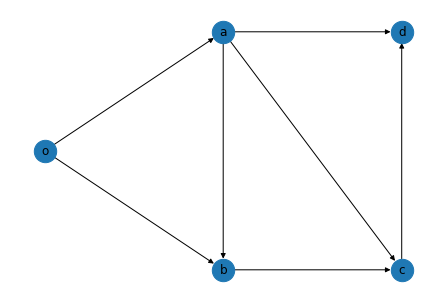

In [2]:
G = nx.DiGraph()
G.add_edges_from([("o","a"),("o","b"),("a","b"),("a","c"),("a","d"),("b","c"),("c","d")])

pos = {"o":[-2,0], "a":[0,1], "b":[0,-1], "c":[2,-1], "d":[2,1]}

#plotting G

nx.draw(G,pos, with_labels=True, node_size = 500)

In [3]:
Lambda = [
[0, 2/3, 1/3, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 1]]

#add a self-loop in node d to make Lambda not singular



w = np.sum(Lambda, axis=1)
w_star = np.max(w)

#calculate matrix Q

Q = Lambda/w_star 
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

#calculate the normalized transition matrix

D = np.diag(w)
P = np.linalg.inv(D) @ Lambda



**(b) Proportional rate:**

The rate of the Poisson clock of each node is equal to the number of particles in it.
- Simulate the system for 60 time units and plot the evolution of the number of particles in each node over time.
- What is the largest input rate that the system can handle without blowing up?

In [4]:
#set number of particles, origin and time units

enter_node = 0
exit_node = 4
time_units = 60

#set the input rate

input_rate = 1

#keep trace of the number of particles in nodes
    
nodes = np.zeros((5,1), dtype = int) 

#initialize the vector to store the time of all transitions

transition_times = [0]

#now compute the input clock and the node clocks

input_clock = -np.log(np.random.rand())/(input_rate*w_star)
node_clocks = -np.log(np.random.rand(5))/(nodes[:,0]*w)

P_cum = np.cumsum(P, axis=1)

i = 1
    
while transition_times[i-1]<time_units:
    
    #store a copy of previous states
    
    new_nodes = nodes[:,i-1].copy()
    
    #check if the first to tick is the input clock add a particle in o
    
    if input_clock <= np.min(node_clocks):
        
        #a particle enters in o
               
        new_nodes[enter_node] = new_nodes[enter_node]+1
        
        transition_times.append(transition_times[i-1] + input_clock)
        
    else:
        
        #check the node that clocks as first
        
        starting_node = np.argmin(node_clocks)
        
        transition_times.append(transition_times[i-1] + np.min(node_clocks))
        
        #check if the first to clock is node d
        
        if starting_node == exit_node:

            #a particle exits from d
            
            new_nodes[starting_node] = new_nodes[starting_node]-1
            
        else:
            
            #calculate the arriving node
            
            arriving_node = np.argwhere(P_cum[int(starting_node)] > np.random.rand())[0]
            
            new_nodes[starting_node] = new_nodes[starting_node]-1
            new_nodes[arriving_node] = new_nodes[arriving_node]+1
    
    #concatenate new nodes distribution to vector nodes
    
    new_nodes = np.reshape(new_nodes,(5,1))
    nodes = np.concatenate((nodes, new_nodes), axis = 1)
    
    #calculate new clocks
    
    input_clock = -np.log(np.random.rand())/(input_rate*w_star)
    node_clocks = -np.log(np.random.rand(5))/(nodes[:,i]*w)
       
    i+=1


/home/probook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/probook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in true_divide


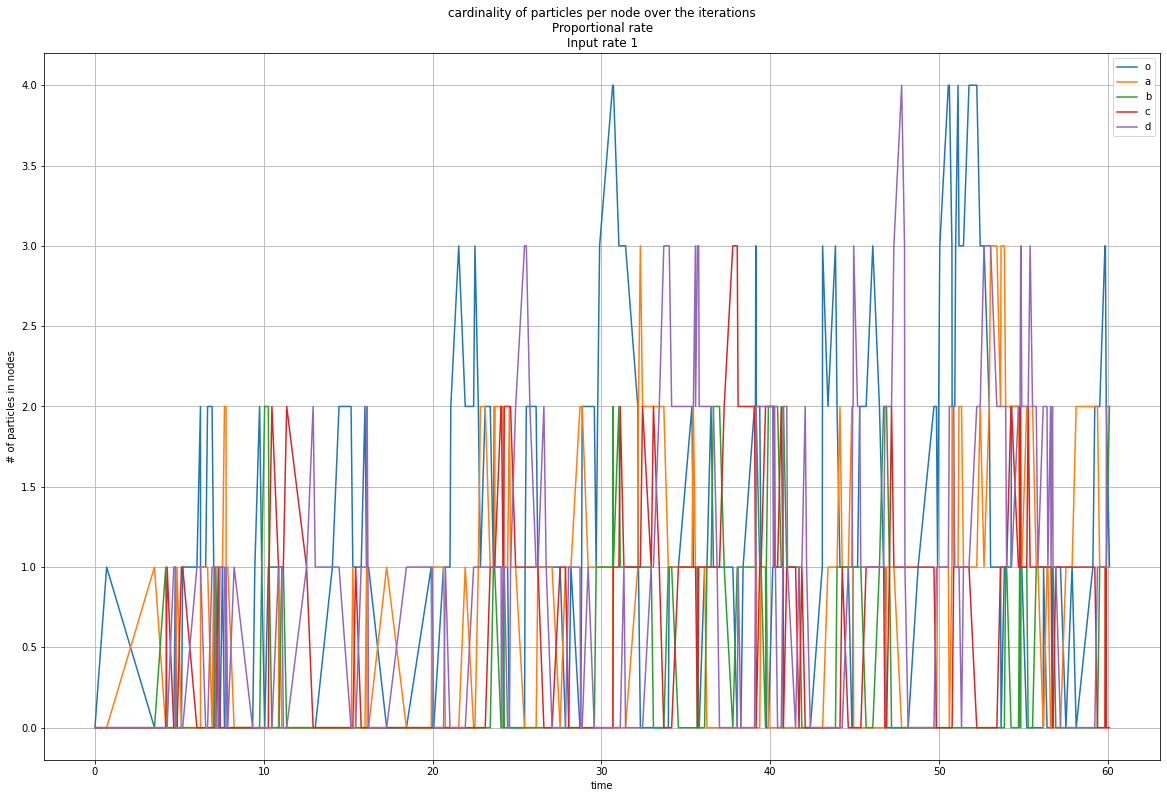

In [5]:
plt.figure(figsize=[20,13])
labels = ["o", "a", "b", "c", "d"]


for i in range(nodes.shape[0]):
    plt.plot(transition_times, nodes[i])

plt.grid()
plt.legend(labels)
plt.title("cardinality of particles per node over the iterations\nProportional rate\nInput rate 1")
plt.xlabel("time")
plt.ylabel("# of particles in nodes")
plt.show()

**(b) Fixed rate:**

The rate of the Poisson clock of each node is fixed, and equal to one.
- Simulate the system for 60 time units and plot the evolution of number of particles in each node over time.
- What is the largest input rate that the system can handle without blowing up? Why is this different from the other case?

In [6]:
#set number of particles, origin and time units

enter_node = 0
exit_node = 4
time_units = 60

#set the input rate

input_rate = 1

#keep trace of the number of particles in nodes
    
nodes = np.zeros((5,1), dtype = int) 

#initialize the vector to store the time of all transitions

transition_times = [0]

#now compute the input clock and the node clocks

input_clock = -np.log(np.random.rand())/(input_rate*w_star)
node_clocks = -np.log(np.random.rand(5))/w

P_cum = np.cumsum(P, axis=1)

i = 1
    
while transition_times[i-1]<time_units:
    
    #store a copy of previous states
    
    new_nodes = nodes[:,i-1].copy()
    
    #check if the first to tick is the input clock add a particle in o
    
    if input_clock <= np.min(node_clocks):
        
        #a particle enters in o
               
        new_nodes[enter_node] = new_nodes[enter_node]+1
        
        transition_times.append(transition_times[i-1] + input_clock)
        
    else:
        
        #check the node that clocks as first
        
        starting_node = np.argmin(node_clocks)
        
        if new_nodes[starting_node] >= 1:
        
            transition_times.append(transition_times[i-1] + np.min(node_clocks))

            #check if the first to clock is node d

            if starting_node == exit_node:

                #a particle exits from d

                new_nodes[starting_node] = new_nodes[starting_node]-1

            else:

                #calculate the arriving node

                arriving_node = np.argwhere(P_cum[int(starting_node)] > np.random.rand())[0]

                new_nodes[starting_node] = new_nodes[starting_node]-1
                new_nodes[arriving_node] = new_nodes[arriving_node]+1
                
        else:
            
            #calculate new clocks
    
            input_clock = -np.log(np.random.rand())/(input_rate*w_star)
            node_clocks = -np.log(np.random.rand(5))/w
            
            continue 
    
    #concatenate new nodes distribution to vector nodes
    
    new_nodes = np.reshape(new_nodes,(5,1))
    nodes = np.concatenate((nodes, new_nodes), axis = 1)
    
    #calculate new clocks
    
    input_clock = -np.log(np.random.rand())/(input_rate*w_star)
    node_clocks = -np.log(np.random.rand(5))/w
       
    i+=1
     

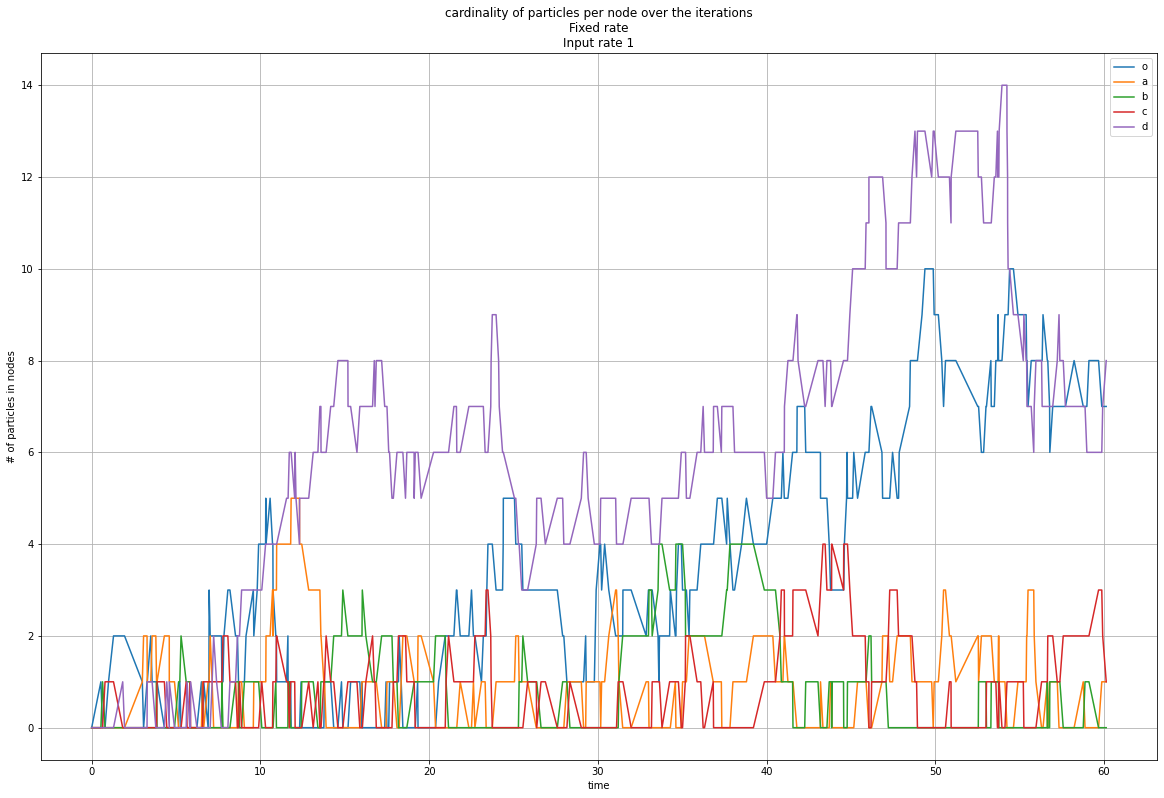

In [7]:
plt.figure(figsize=[20,13])
labels = ["o", "a", "b", "c", "d"]


for i in range(nodes.shape[0]):
    plt.plot(transition_times, nodes[i])

plt.grid()
plt.legend(labels)
plt.title("cardinality of particles per node over the iterations\nFixed rate\nInput rate 1")
plt.xlabel("time")
plt.ylabel("# of particles in nodes")
plt.show()